In [1]:
#Importing the modules                             
import numpy as np   # Tarik Bugra Ozyurt 150190088
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the data
training_df = pd.read_csv( "data/optdigits.tra", header=None)
X_training, y_training = training_df . loc [:,:63], training_df.loc[:,64]
testing_df = pd.read_csv("data/optdigits.tes", header=None)
X_testing, y_testing = testing_df.loc[:,:63], testing_df.loc[: ,64]

In [5]:
# Neural network class
class neural_network(object):
    def __init__(self):
        self.input = 64 # feature number
        self.output = 64 # feature number, same with output as this is an autoencoder
        self.hidden_units = 2 # single hidden layer with 2 neurons
        
        np.random.seed(1) 
        
        # Xavier initialization, tried it, gave a litte better result on learning but not on plotting hidden layers
        # std1 = np.sqrt(2 / (self.input + self.hidden_units))                  
        # self.w1 = np.random.normal(0, std1, (self.input, self.hidden_units))  
        # std2 = np.sqrt(2 / (self.output + self.hidden_units))
        # self.w2 = np.random.normal(0, std2, (self.hidden_units, self.output))
        
        # initialize matrix of weights and biases, randomly for weights zeros for biases
        self.w1 = np.random.randn(self.input, self.hidden_units) # 64*2 matrix 
        self.b1 = np.zeros((self.hidden_units,1)) # 2*1 matrix
        
        self.w2 = np.random.randn(self.hidden_units, self.output) # 2*64 matrix
        self.b2 = np.zeros((self.output, 1))  # 64*1 matrix
    
    # sigmoid activation function
    def _sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    # sigmoid prime function, it is derivative of sigmoid
    def _sigmoid_prime(self, z):
        return self._sigmoid(z)*(1-self._sigmoid(z))
        
    # forward propagation
    def _forward_propagation(self, X):
        self.z2 = np.dot(self.w1.T, X.T) + self.b1
        self.a2 = self._sigmoid(self.z2)
        self.z3 = np.dot(self.w2.T, self.a2) + self.b2
        self.a3 = self._sigmoid(self.z3)
        return self.a3
    
    # calculate loss to printing training phase, used mse, not cross entrophy because I 'revert sigmoided' outputs after learning phase
    def _calculate_loss(self, y, predicted):
        m = y.shape[0]
        print(predicted)
        loss = np.sum(np.power((y - predicted),2)) / m 
        return loss

    # backward propagation calculating dw's and db's
    def _backward_propagation(self, X, y):
        m = X.shape[0]
        delta3 = (y / 16 - self.a3) * self._sigmoid_prime(self.z3)
        delta2 = np.dot(delta3.T, self.w2.T) * self._sigmoid_prime(self.z2.T)
        self.dw2 = - (1/m) * np.dot(self.a2, delta3.T)
        self.db2 = - (1/m) * np.sum(delta3.values, axis=1, keepdims = True)
        self.dw1 = - (1/m) * np.dot(X.T, delta2)
        self.db1 = - (1/m) * np.sum(delta2.T, axis=1, keepdims = True)
    
    # function to update weights and biases
    def _update(self, learning_rate=2):  
        self.w1 = self.w1 - learning_rate * self.dw1
        self.w2 = self.w2 - learning_rate * self.dw2
        self.b1 = self.b1 - learning_rate * self.db1
        self.b2 = self.b2 - learning_rate * self.db2
        
    # train neural network
    def train(self, X, y, iteration=300):
        y = y.T
        losses = list()
        for i in range(iteration):
            y_hat = self._forward_propagation(X)
            loss = self._calculate_loss(y, y_hat*16)
            self._backward_propagation(X,y)
            self._update()
            losses.append(np.mean(loss.values))
            if i%49==0:  # print loss for every sample and average loss
                print("loss: ", loss)
                print("mean loss: ", np.mean(loss.values))
        return losses
                
    # predict, mmultiply with 16 because we used sigmoid activation function, np.round function can be called to get integer estimations
    def predict(self, X):
        y_hat = self._forward_propagation(X)
        # y_hat = np.round_(y_hat * 16)
        # return np.array(y_hat)
        return np.array(y_hat * 16)
    

[[10.54494476  9.31593474  3.70568728 ... 10.70937641 10.7101099
   3.71260954]
 [14.00260791 13.64451235 11.25374581 ... 14.04912339 14.04933036
  11.25847551]
 [ 9.81624633  9.38172499  7.27828632 ...  9.87662644  9.87689736
   7.28162166]
 ...
 [13.76392791 13.04421754  7.70767939 ... 13.8525819  13.85297363
   7.71755222]
 [13.12335319 12.97191096 12.18230767 ... 13.14420507 13.14429854
  12.18366575]
 [ 5.48887412  6.1526686   9.46138232 ...  5.39811119  5.39770485
   9.45622988]]
loss:  0       67.334449
1       64.035023
2       61.472508
3       70.117485
4       55.138939
          ...    
3818    63.718245
3819    73.789142
3820    79.049711
3821    68.157063
3822    61.688409
Length: 3823, dtype: float64
mean loss:  66.83410722295577
[[ 2.64231518  2.64231518  2.64231518 ...  2.64231518  2.64231518
   2.64231518]
 [ 9.64477899  9.64477899  9.64477899 ...  9.64477899  9.64477899
   9.64477899]
 [ 6.49936346  6.49936346  6.49936346 ...  6.49936346  6.49936346
   6.49936346]
 .

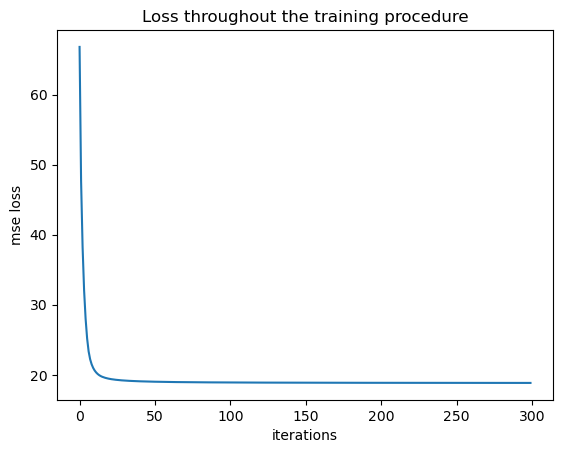

In [6]:
#loss function for testing dataset
def loss(predict, y):
        m = y.shape[0]
        logprobs = np.power((y - predict),2)
        loss = np.sum(logprobs) / m
        return loss

# create and initialize neural network
my_nn = neural_network()
my_nn.__init__()

# train model, training dataset features for both input and desired output
losses = my_nn.train(X_training, X_training) 

# predict for test dataset
predicted_values = my_nn.predict(X_testing) 

# calculate losses and average loss for test dataset
print("\nlosses and average loss for test dataset: \n", loss(predicted_values, X_testing.T))
print(np.mean(loss(predicted_values, X_testing.T)))
# outputs exceeds size limit, open it in a text editor!

# plot loss thought training
iterations = list(range(0,300))
plt.plot(iterations ,losses)
plt.title("Loss throughout the training procedure")
plt.xlabel('iterations') 
plt.ylabel('mse loss')
plt.show()

-From Report, discussion of Loss throughout the training procedure plot-

I could not manage to get the average loss for one sample below 18-19. A reason for this can be the structure of neural network. Reducing dimension
number to 2 was a decision made so that it could be plotted. Reducing number of features from 64 to 2 can limit the representation of data. If you notice any mistake in my model or have a prominent suggestion for further improvement to get better results, I would appreciate the feedback.

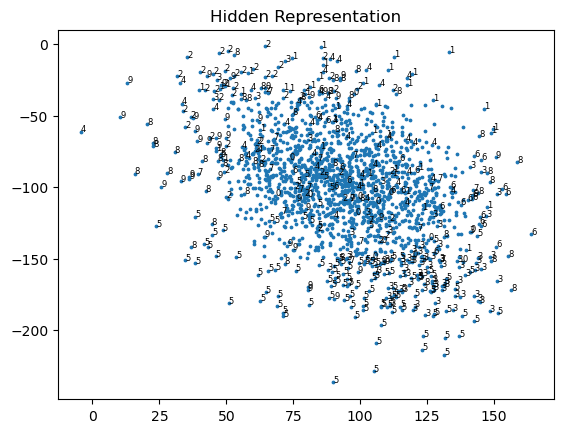

In [ ]:
# plot hidden layer
fig, ax = plt.subplots()
plt.title("Hidden Representation")
# plt.xlabel('Hidden 1')  
# plt.ylabel('Hidden 2') 

# when i use a2 like in the book, the sigmoid function outputs for hidden layer, i get very crowded and biases results that have not any 
# worthiness as a plot, so i used hidden layer values before activation function, z2
hidden1 = my_nn.z2[0]
hidden2 = my_nn.z2[1]

ax.scatter(hidden1, hidden2, s=3)  
for i, label in enumerate(y_testing): # for a prettier and more comprehensible plot, only show one tenth of the numbers and points around crowdy area
    if i%10 == 0 or hidden1[i] > 140 or hidden1[i] < 50 or hidden2[i] > -40 or hidden2[i] < -150: 
        ax.text(hidden1[i], hidden2[i], label, fontsize=6)
plt.show()

-From Report, discussion of Hidden Representation Plot-

It can be seen 5’s are distributed below the graph, 2’s, 8’s and 9’s in left-up. 3’s right-down, 1’s right-up, 4’s in the upper half. I used values of hidden layer before applying sigmoid activation function because this result to a incomprehensible graph that was scattered to the extremes. Also initialization of weights and determining learning rate was critical for hidden layer values to be scatter fairly and yield an expressive graph. It can be understood from the fact that the numbers in the graph appear ,more or less, clustered, a dimentionality reduction has been applied to the data set to a certain extent. If I had implemented the autoencoder with a deeper neural network model, that results in a deep autoencoder, I could have gotten better results, but my time was just enough for this one unfortunately.